<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   number               60 non-null     int64  
 1   Mean_SocialD         60 non-null     float64
 2   Trait                60 non-null     object 
 3   Reversed             60 non-null     int64  
 4   Text                 60 non-null     object 
 5   normal_human.mean    60 non-null     float64
 6   old_people.mean      60 non-null     float64
 7   persona_GPT3.5.mean  60 non-null     float64
 8   shape_GPT3.5.mean    60 non-null     float64
 9   persona_GPT4.mean    60 non-null     float64
 10  shape_GPT4.mean      60 non-null     float64
 11  persona_LLaMA3.mean  60 non-null     float64
 12  shape_LLaMA3.mean    60 non-null     float64
dtypes: float64(9), int64(2), object(2)
memory usage: 6.2+ KB
None


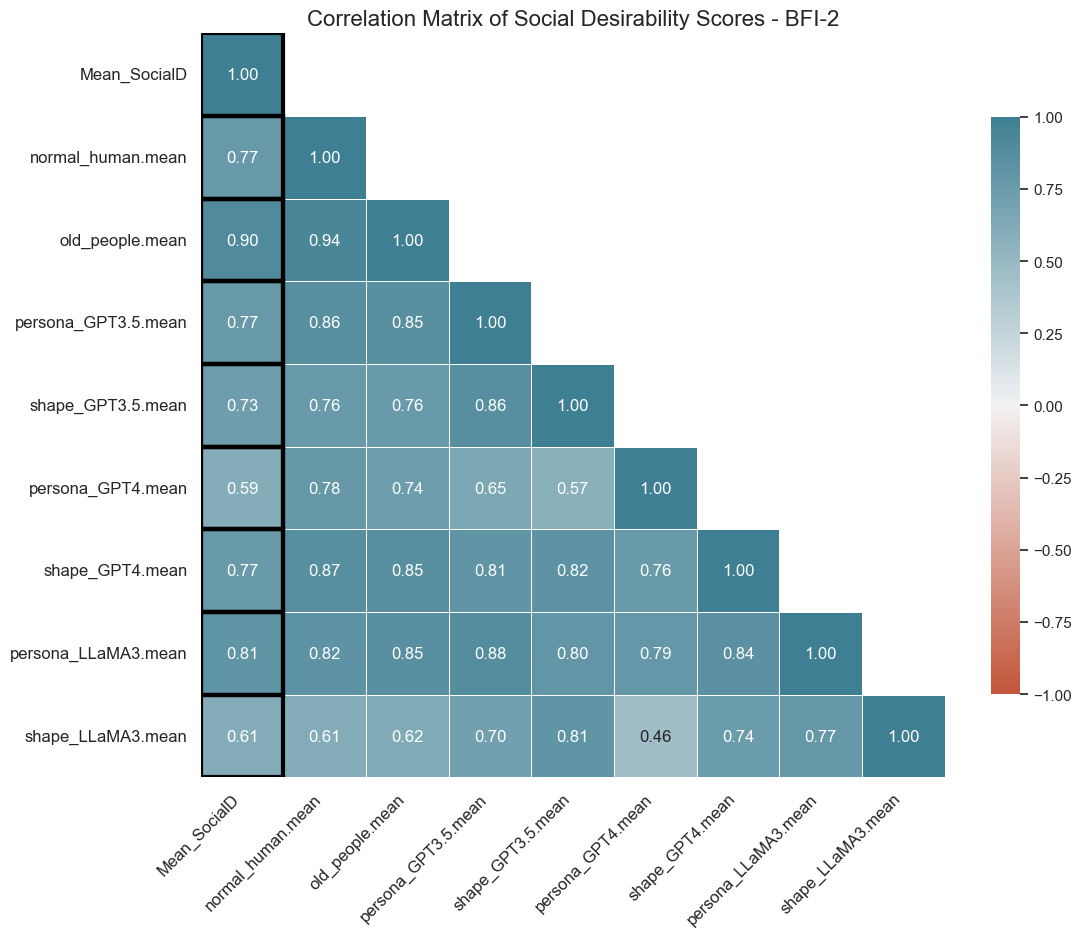

Correlation between Mean_SocialD and normal_human.mean: 0.767, p-value: 9.321e-13
Correlation between Mean_SocialD and old_people.mean: 0.905, p-value: 3.678e-23
Correlation between Mean_SocialD and persona_GPT3.5.mean: 0.773, p-value: 4.853e-13
Correlation between Mean_SocialD and shape_GPT3.5.mean: 0.733, p-value: 2.695e-11
Correlation between Mean_SocialD and persona_GPT4.mean: 0.595, p-value: 5.406e-07
Correlation between Mean_SocialD and shape_GPT4.mean: 0.765, p-value: 1.066e-12
Correlation between Mean_SocialD and persona_LLaMA3.mean: 0.805, p-value: 9.019e-15
Correlation between Mean_SocialD and shape_LLaMA3.mean: 0.608, p-value: 2.563e-07


In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

data_social_desirability = pd.read_csv("Data/social_desirability.csv")


print(data_social_desirability.info())

corr_matrix = data_social_desirability[['Mean_SocialD', 'normal_human.mean', 'old_people.mean', 
                                        'persona_GPT3.5.mean', 'shape_GPT3.5.mean', 
                                        'persona_GPT4.mean', 'shape_GPT4.mean', 
                                        'persona_LLaMA3.mean', 'shape_LLaMA3.mean']].corr()


mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)

sns.set(style='white')

plt.figure(figsize=(12, 10))

cmap = sns.diverging_palette(20, 220, as_cmap=True)

sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .75})

for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if 'Mean_SocialD' in [corr_matrix.columns[i], corr_matrix.columns[j]]:
            plt.gca().add_patch(plt.Rectangle((i, j-1), 1, 1, fill=False, edgecolor='black', lw=3))
for i in range(len(corr_matrix.columns)):
    if 'Mean_SocialD' in corr_matrix.columns[i]:
        for j in range(len(corr_matrix.columns)):
            if i != j:
                plt.gca().add_patch(plt.Rectangle((i, j), 1, 1, fill=False, edgecolor='black', lw=3))

plt.title('Correlation Matrix of Social Desirability Scores - BFI-2', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.show()

variables = ['normal_human.mean', 'old_people.mean', 'persona_GPT3.5.mean', 'shape_GPT3.5.mean', 
             'persona_GPT4.mean', 'shape_GPT4.mean', 'persona_LLaMA3.mean', 'shape_LLaMA3.mean']

for var in variables:
    corr, p_value = pearsonr(data_social_desirability['Mean_SocialD'], data_social_desirability[var])
    print(f'Correlation between Mean_SocialD and {var}: {corr:.3f}, p-value: {p_value:.3e}')

